In [1]:
# Bruno Vieira Ribeiro 03/2021

<img src="https://www.thephotoargus.com/wp-content/uploads/2019/01/fungi12.jpg" width = "600">

The [mushroom data set](https://archive.ics.uci.edu/ml/datasets/Mushroom) has been contributed to the UCI Machine Learning over 30 years ago. From the authors description:

> This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. **The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.**

Each mushroom is characterized by 22 distinct features:

* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
* bruises: bruises=t,no=f
* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
* gill-attachment: attached=a,descending=d,free=f,notched=n
* gill-spacing: close=c,crowded=w,distant=d
* gill-size: broad=b,narrow=n
* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
* stalk-shape: enlarging=e,tapering=t
* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
* veil-type: partial=p,universal=u
* veil-color: brown=n,orange=o,white=w,yellow=y
* ring-number: none=n,one=o,two=t
* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

All features are categorical (and not numeric), so it poses a good exercise for encoding.

<img style="float: right;" src="https://media.springernature.com/lw785/springer-static/image/chp%3A10.1007%2F978-3-319-17900-1_120/MediaObjects/327013_2_En_120_Fig1_HTML.gif">

With a quick look at these features, we can notice 5 different kinds of features relating to the "anatomy" of the mushrooms: **cap, gill, stalk, veil and ring**. From the figure we can get an ideia of what each feature is.

Besides this features, we have **odor**, which has a clear meaning as does **bruises** (you can check for an interesting article on why *magic mushrooms* turn blue when bruised [here](https://www.nature.com/articles/d41586-019-03614-0)). Also, we have **spore-print**, which, according to the [Wikipedia](https://en.wikipedia.org/wiki/Spore_print#:~:text=The%20spore%20print%20is%20the,fall%20onto%20a%20surface%20underneath.&text=It%20shows%20the%20color%20of%20the%20mushroom%20spores%20if%20viewed%20en%20masse.) page is defined as
> The spore print is the powdery deposit obtained by allowing spores of a fungal fruit body to fall onto a surface underneath. It is an important diagnostic character in most handbooks for identifying mushrooms. It shows the color of the mushroom spores if viewed en masse.



<img style="float: left;" src="http://ids-mushroom.appspot.com/images/mushroom%20wireframes_Population.png" width = "600">

**population** relates to the way the mushroom grows. The image to the left shows examples of three kinds of population. And, finally, **habitat** refers to where the mushroom grows. According to the [Intermountain Herbarium](https://herbarium.usu.edu/fun-with-fungi/collect-and-identify#:~:text=Where%20they%20grow%2C%20such%20as,%2C%20is%20the%20mushrooms'%20substrate.) of the Utah State University:
> Mushrooms are found almost everywhere, but not all mushrooms are found in all kinds of habitat. Where they grow, such as coniferous forest, oak forest, etc., is the mushrooms' habitat. Some mushrooms develop in only one kind of habitat, such as a bog, a forest, or an open lawn or meadow. What they actually emerge from, such as peat, a log, or soil, is the mushrooms' substrate.

<span style="color:red">Before going to the data, we want to be very clear: this should not be considered as a guide for mushroom picking. Again, from the [Intermountain Herbarium](https://herbarium.usu.edu/fun-with-fungi/collect-and-identify#:~:text=Where%20they%20grow%2C%20such%20as,%2C%20is%20the%20mushrooms'%20substrate.):
> People die every year from eating tasty but poisonous mushrooms. There are no so-called tests for telling a poisonous mushroom from a non-poisonous one.
</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%config Completer.use_jedi = False        # For autocomplete to work!

In [3]:
sns.set_style("white")
sns.set(rc={'figure.figsize':(10,6)})

INTERESTING SITE ABOUT THIS DATA SET [HERE](http://ids-mushroom.appspot.com/)

# 1- Into the data

In [4]:
df_mush = pd.read_csv('mushrooms.csv')

In [5]:
df_mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Let's begin by checking for any missing values and doing a quick description of the data set:

In [6]:
df_mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Great! No missing values. Now we can see the number of unique entries for each column:

In [7]:
df_mush.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

To get a good visual for this, we can use the `describe()` method along with some seaborn plots:

In [8]:
# I'll transpose the describe to get our column names as 'indexes'
df_mush.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


We can use this `df` to do a barplot and "see" the different unique values:

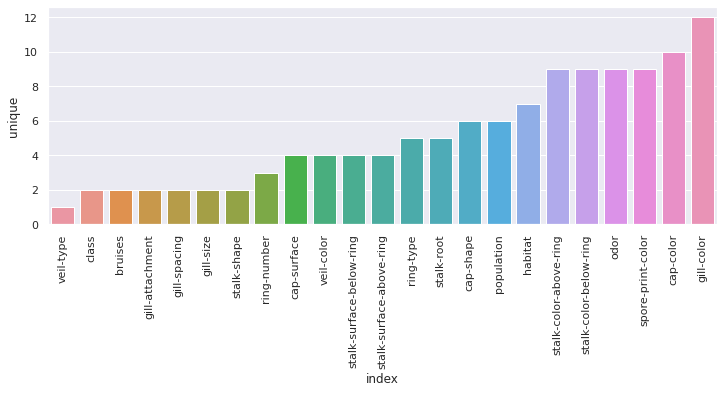

In [9]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_mush.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

So, `gill-color` has the highest number of unique values (12) and `veil-type` only has one value (**hint**: if all mushrooms in our data set have the same value for this feature, it can be droped for modeling purposes later on). Let's see what is this value:

In [10]:
df_mush.iloc[0]['veil-type']

'p'

So, all mushrooms in this data set have a 'partial' veil type.

# 2- EDA

As the main goal of our modeling is to do a classification task with the `class` column as target, we should do a count plot to see if we have any imbalance.

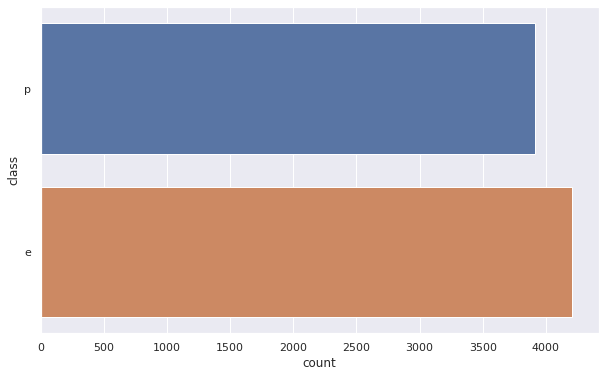

In [11]:
sns.countplot(data = df_mush, y ='class');

The data set is well balanced. Now to check how features are distributed in each class we create a helper function that shows the distribution of a given feature along its distribution according to class (edible or poisonous).

In [12]:
# fig = px.histogram(df_mush, x ="bruises",
#                    color_discrete_sequence=['darkgreen']).update_xaxes(categoryorder="total descending")
# fig.show()

In [13]:
# fig = px.histogram(df_mush, x="bruises", color="class", barmode="group")
# fig.show()

In [14]:
def get_dists(feature):
    fig, axes = plt.subplots(1, 2, figsize=(21, 6))
    fig.suptitle('Distribution of '+ feature + ' feature')

    sns.countplot(ax = axes[0], data=df_mush, x=feature, palette="tab10",
                  order = df_mush[feature].value_counts().index)
    axes[0].set_title('Distribution')

    sns.countplot(ax = axes[1], data=df_mush, x=feature, hue='class',
                  order = df_mush[feature].value_counts().index)
    axes[1].set_title('Distribution according to class');

Testing our function on the `bruises` column:

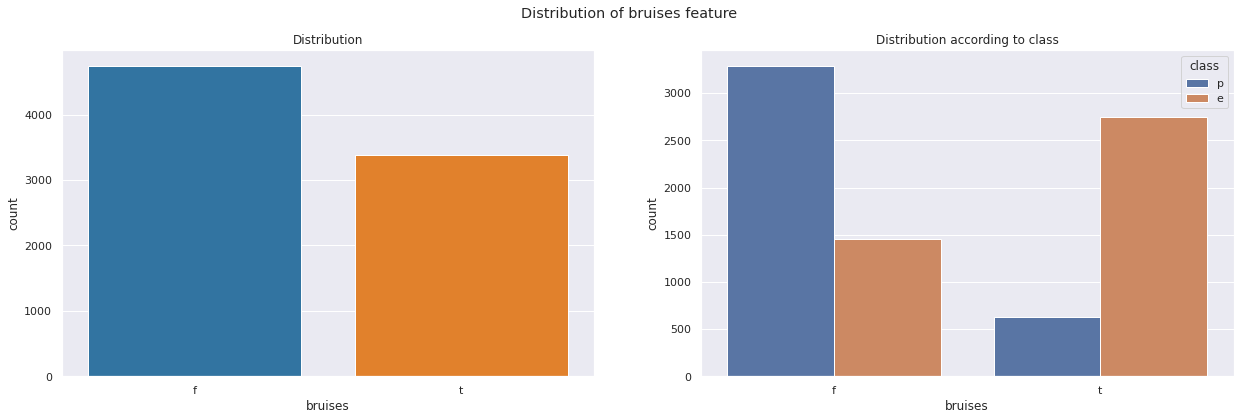

In [15]:
get_dists('bruises')

The feature with the highest number of unique values was `gill-color`. Let's cjeck its distribution:

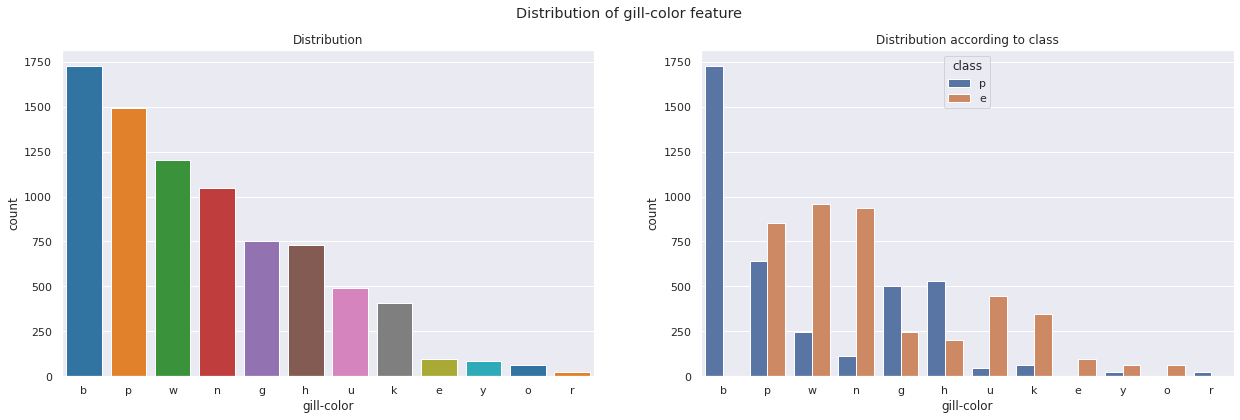

In [16]:
get_dists('gill-color')

   We can check any feature now! Let's see the `odor` feature:

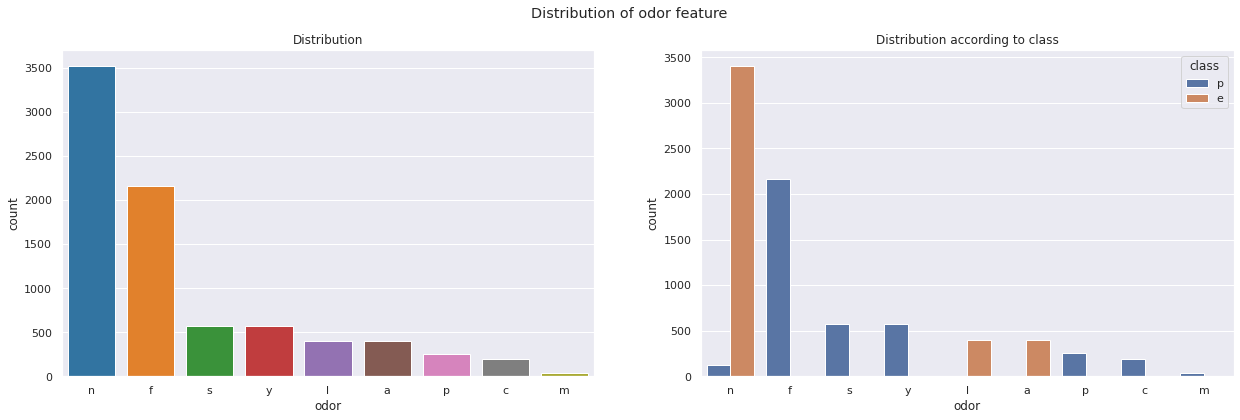

In [17]:
get_dists('odor')

# 3- Modeling

We'll start by building a decision tree and improve upon it. First of all, we need to split our data into features and target and process our data to get dummie variables (one-hot encode).

In [18]:
X = df_mush.drop('class', axis = 1)
y = df_mush['class']

Actually, remember we have a feature with only one unique value: `veil-type`. We can drop it from our X:

In [19]:
X = X.drop('veil-type', axis = 1)

Now, to get our dummie variables:

In [20]:
X = pd.get_dummies(X,drop_first=True)

## Train-test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Base model

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
base_tree = DecisionTreeClassifier()

In [25]:
base_tree.fit(X_train, y_train)

DecisionTreeClassifier()

## Evaluating the base model

I'll write a helper function to report on our model. This function will report back the accuracy score, confusion matrix, classification report and an optional visual for our built tree (default will be  NOT to plot the tree).

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [27]:
def report_model(model, visual = False):
    model_preds = model.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test,model_preds))
    print(60*'=')
    print(classification_report(y_test, model_preds))
    print(60*'=')
    plot_confusion_matrix(model, X_test, y_test)
    if visual:
        print('\n')
        plt.figure(figsize=(12,8),dpi=150)
        plot_tree(model,filled=True,feature_names=X.columns);

Accuracy:  1.0
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625





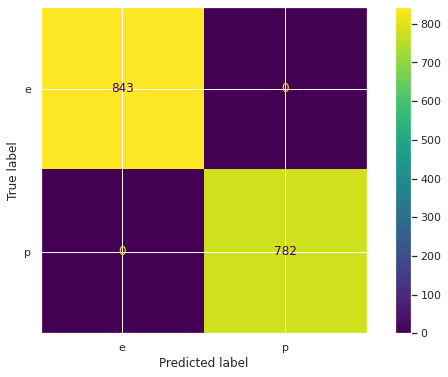

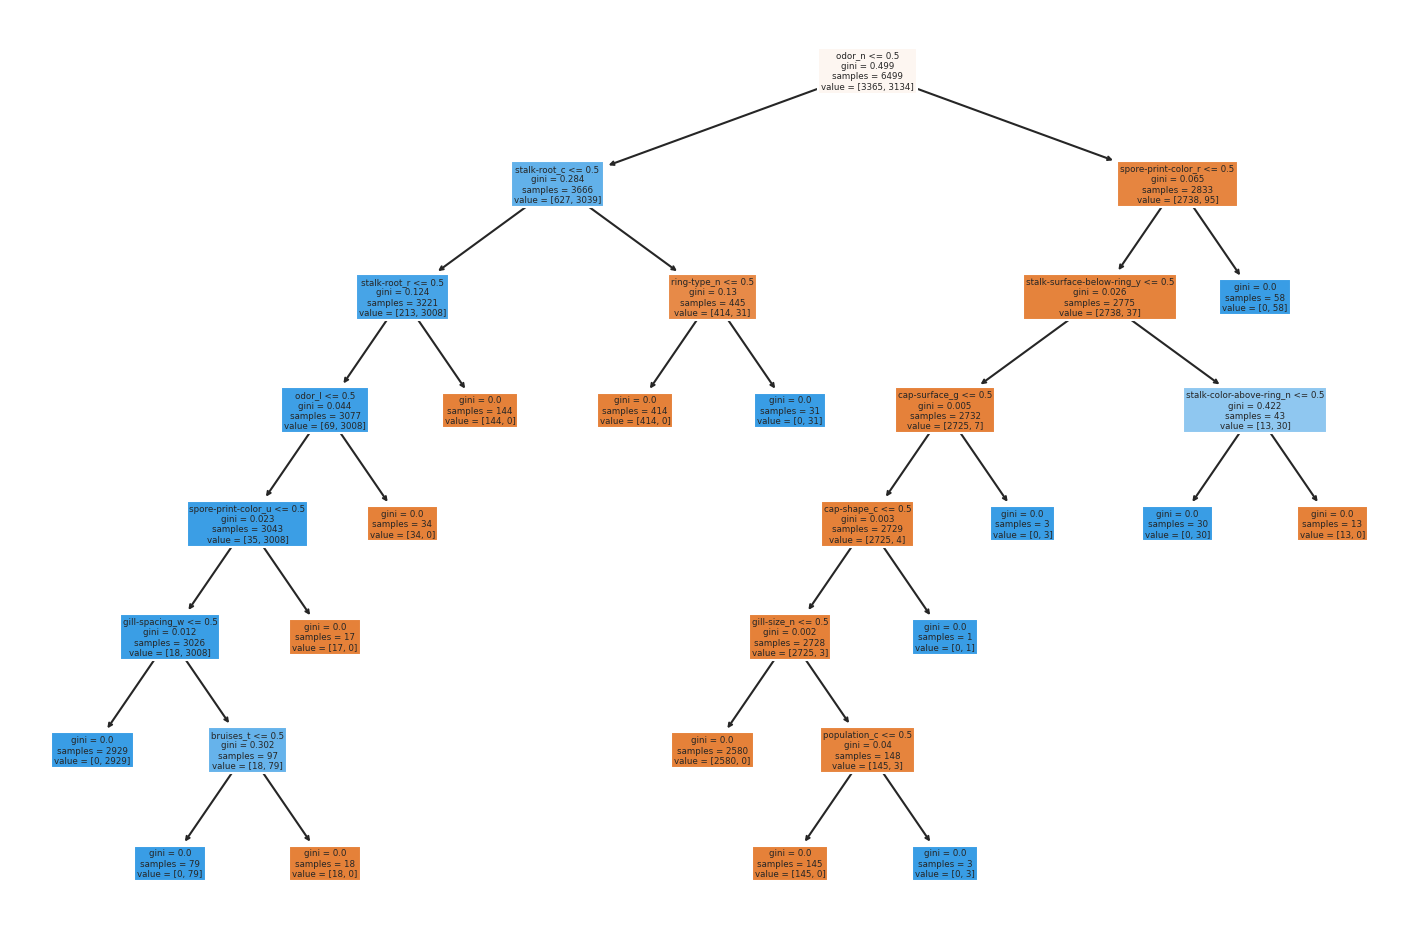

In [28]:
report_model(base_tree, visual=True)

Cool, we got a perfect fit in our very simple tree!

We could always count from the image, but let's see how many leaf nodes we have in this tree and its depth:

In [29]:
print('Number of leaf nodes: ',base_tree.get_n_leaves())
print('Tree depth: ',base_tree.get_depth())

Number of leaf nodes:  16
Tree depth:  7


We can check feature importances for our model directly in a pandas df object:

In [30]:
feature_imp = pd.DataFrame(index=X.columns,data=base_tree.feature_importances_,columns=['Importance'])
feature_imp.head()

,Importance
cap-shape_c,0.000615
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000


In [31]:
feature_imp = feature_imp.sort_values('Importance', ascending = False)
feature_imp.head()

,Importance
odor_n,0.623110
stalk-root_c,0.179952
stalk-root_r,0.081014
spore-print-color_r,0.034084
odor_l,0.020247


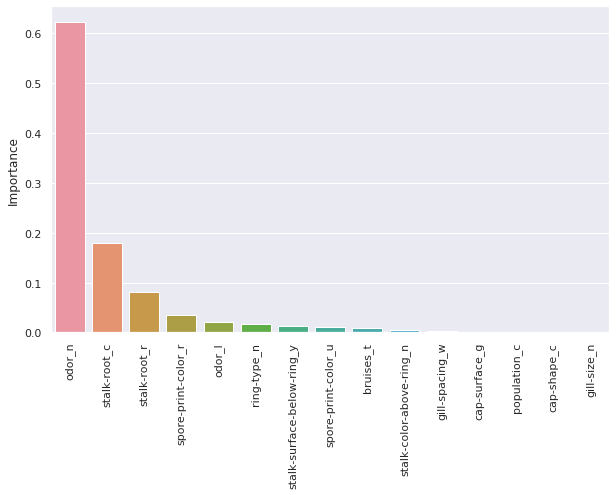

In [32]:
sns.barplot(data = feature_imp[feature_imp['Importance']>0], x = feature_imp[feature_imp['Importance']>0].index, y = 'Importance')
plt.xticks(rotation=90);

So, it seems the mushroom odor is the most important feature when it comes to checking for poisonous ones.

## Cross-validation

In [33]:
from sklearn.model_selection import cross_val_score

Let's create a helper function to print out results from a cross-validation (the number of folds will be set to default to 5).

In [34]:
def get_cv(model, cv = 5):
    print('Cross validating the model: ', model)
    print(50*'=')
    scores = cross_val_score(model,X_train,y_train, scoring='accuracy',cv=cv)

    print('Cross-validated accuracy scores:')
    print(scores)
    print(50*'=')
    print('Mean accuracy score:')
    print(scores.mean())
    print(50*'=' + '\n\n')

In [35]:
get_cv(base_tree)

Cross validiating the model:  DecisionTreeClassifier()
Cross-validated accuracy scores:
[1. 1. 1. 1. 1.]
Mean accuracy score:
1.0




## Prunning the tree

Let's try pruning our tree and seeing how it affects the results. We do this by controling the `max_leaf_nodes` parameter in the decision tree. Setting this equal to 3 is a nice start:

In [36]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

Accuracy:  0.9353846153846154
              precision    recall  f1-score   support

           e       0.96      0.91      0.94       843
           p       0.91      0.96      0.93       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625





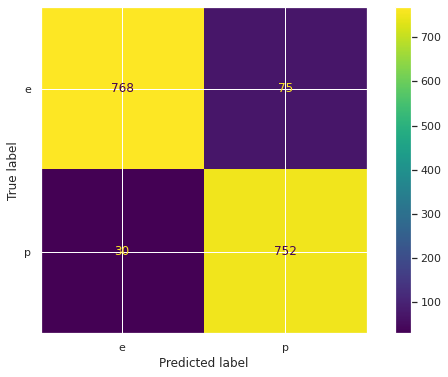

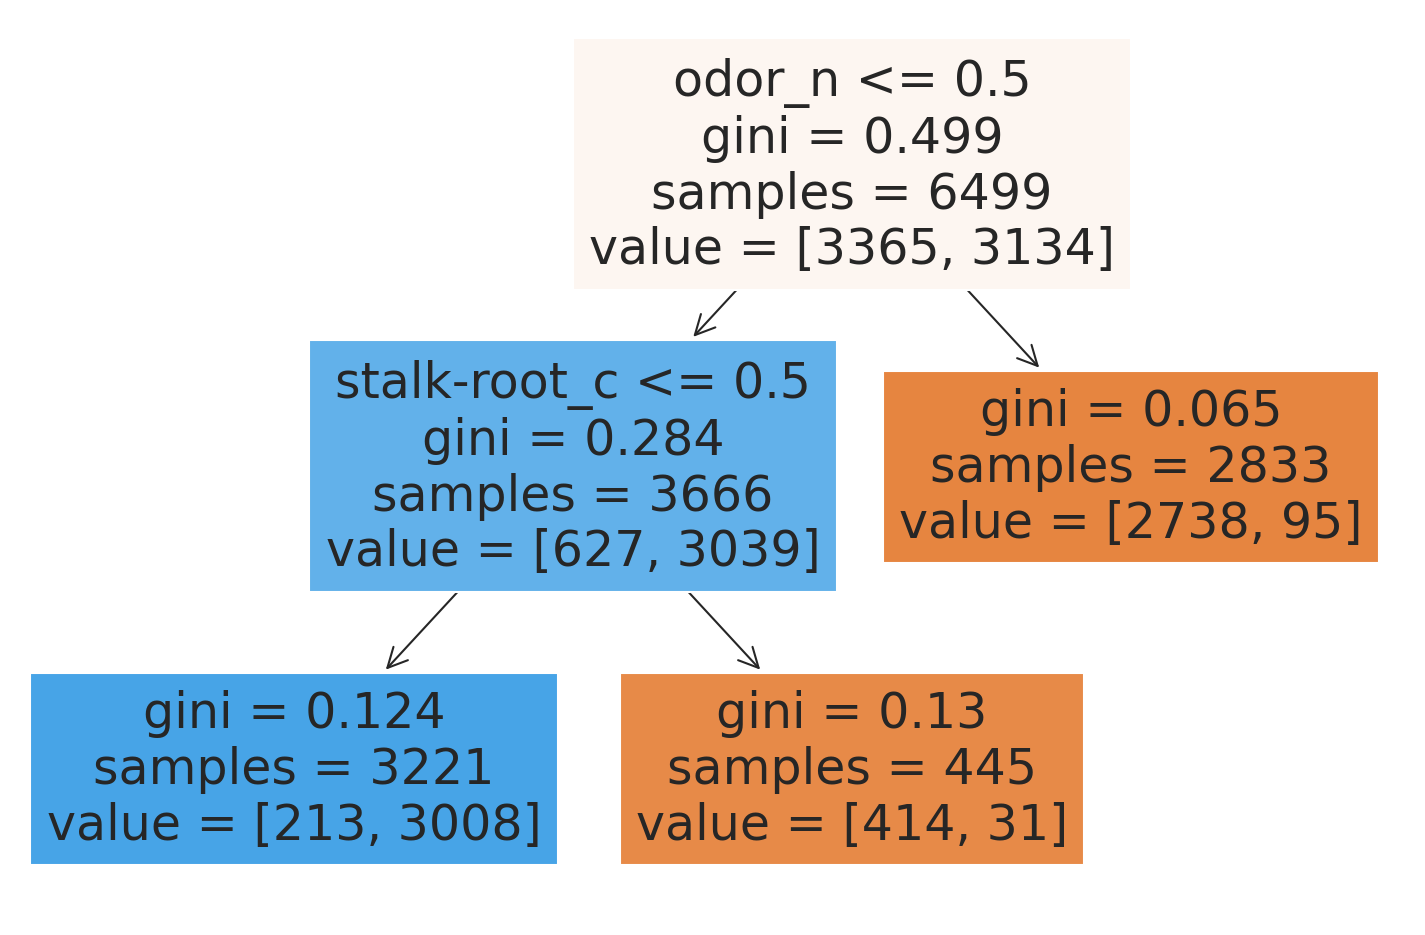

In [37]:
report_model(pruned_tree, visual=True)

Ok, so our VERY simple tree got almost 94% accuracy. We can built many trees with different values for the `max_leaf_nodes` parameter and check when we start hitting that 100% cross-validated accuracy:

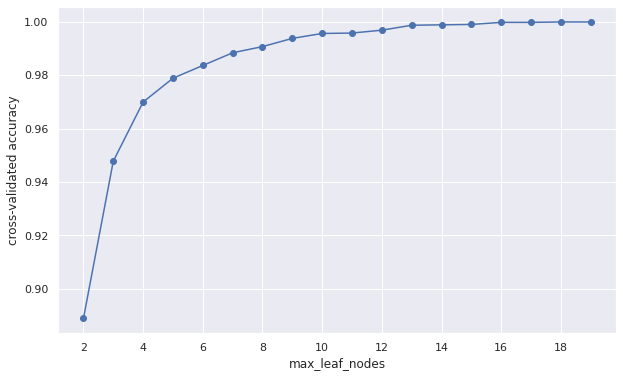

In [38]:
# Let's see how accuracy varies with max_leaf_nodes
acc = []
for leafs in range(2,20):
    tree = DecisionTreeClassifier(max_leaf_nodes=leafs)
    tree.fit(X_train,y_train)
    
    tree_preds = tree.predict(X_test)
    scores = cross_val_score(tree,X_train,y_train, scoring='accuracy',cv=5)
    
    acc.append(scores.mean())
    
plt.plot(range(2,20), acc, '-bo')
plt.xticks(np.arange(2,20,2))
plt.xlabel('max_leaf_nodes')
plt.ylabel('cross-validated accuracy')
plt.show();

Indeed, with 16 leaf nodes we first hit that 100% accuracy.

# Adaptive boosting (just for fun!)

We can use the AdaBoost classifier to play with the ideia of weak learners for this data set. To start off, if we set the number of estimators (`n_estimators`) we'll get a **stump** model corresponding to setting `max_leaf_nodes` = 2). With this, we can get the feature importance and see how well our most important feature classifies the data.

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
stump_model = AdaBoostClassifier(n_estimators=1)
stump_model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

Accuracy:  0.8781538461538462
              precision    recall  f1-score   support

           e       0.96      0.79      0.87       843
           p       0.81      0.97      0.88       782

    accuracy                           0.88      1625
   macro avg       0.89      0.88      0.88      1625
weighted avg       0.89      0.88      0.88      1625



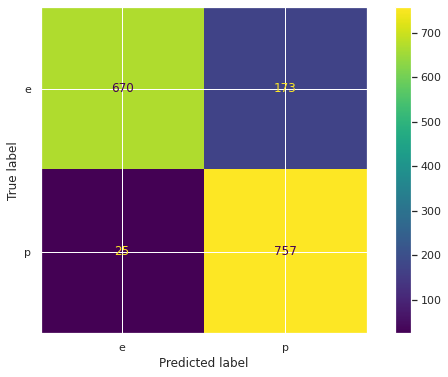

In [41]:
report_model(stump_model)

If we look at the feature importances we should get all values to equal to zero, except one, which should be the most important feature:

In [42]:
stump_model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We can get the index of this non-zero importance and use it to find which column of X it corresponds to:

In [43]:
stump_model.feature_importances_.argmax()

22

In [44]:
X.columns[22]

'odor_n'

So, if the mushroom has no odor (`odor_n` corresponds to odor = none), it is very likely to be edible (**AGAIN: DO NOT USE THIS RESULT TO START EATING STRANGE MUSHROOM YOU SMELL SOMEWHERE!**). We can check this by using our `get_dists` function and seeing how the classes distribute for different odors:

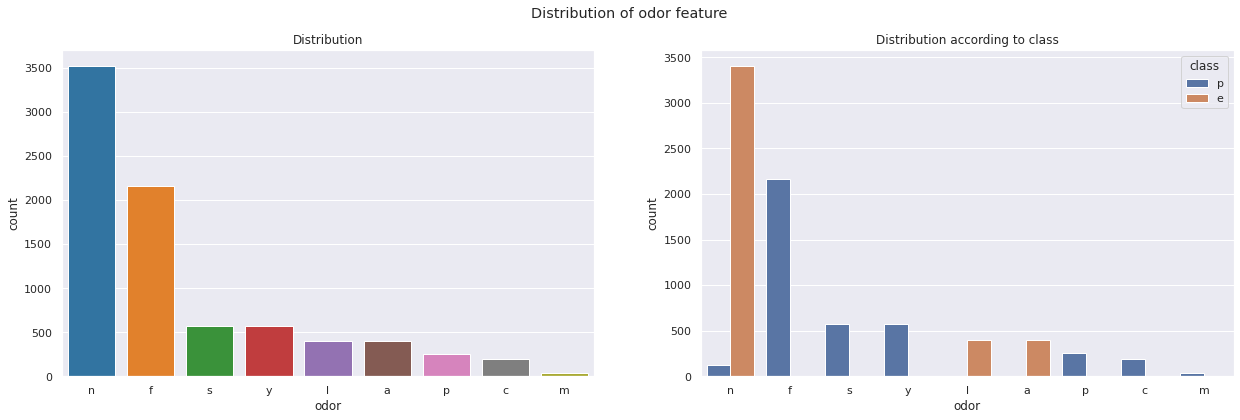

In [45]:
get_dists('odor')

Changing the number of estimators, we start getting better results. Let's see this evolution:

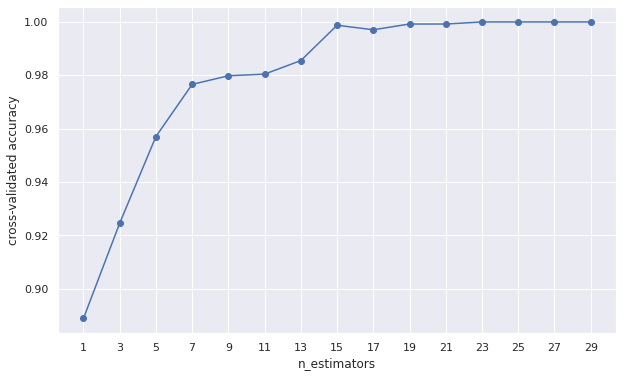

In [46]:
# Let's see how accuracy varies with n_estimators
acc = []
for n in range(1,30,2):
    tree = AdaBoostClassifier(n_estimators=n)
    tree.fit(X_train,y_train)
    
    scores = cross_val_score(tree,X_train,y_train, scoring='accuracy',cv=5)
    
    acc.append(scores.mean())
    
plt.plot(range(1,30,2), acc, '-bo')
plt.xticks(np.arange(1,30,2))
plt.xlabel('n_estimators')
plt.ylabel('cross-validated accuracy')
plt.show();

At around 20, the model seems to have a "perfect" fit. Let's build this model and inspect it:

In [47]:
model = AdaBoostClassifier(n_estimators=20)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=20)

Accuracy:  1.0
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



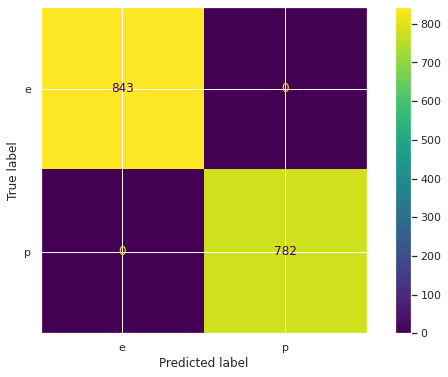

In [48]:
report_model(model)

In [49]:
def plot_importances(model):
    '''Plot non-zero feature importances of a fitted model.'''
    feature_imp = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

    feature_imp = feature_imp.sort_values('Importance', ascending = False)

    sns.barplot(data = feature_imp[feature_imp['Importance']>0], x = feature_imp[feature_imp['Importance']>0].index, y = 'Importance')
    plt.xticks(rotation=90);

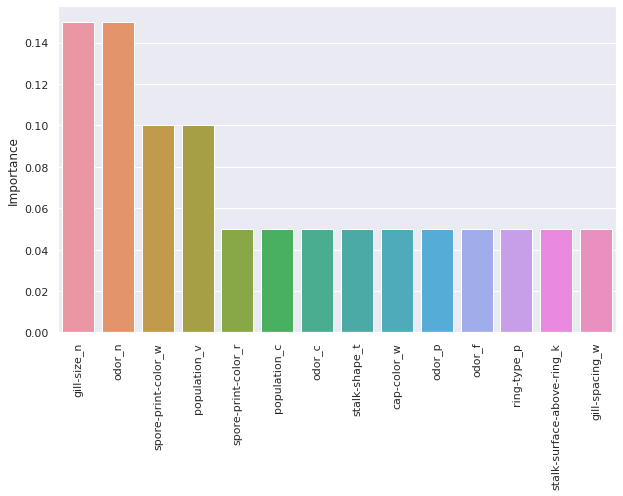

In [50]:
plot_importances(model)

It is interesting that changing the number of estimators, the importance of features changes. We can use our `get_dist` function to see the distribution of the `gill-size` feature.

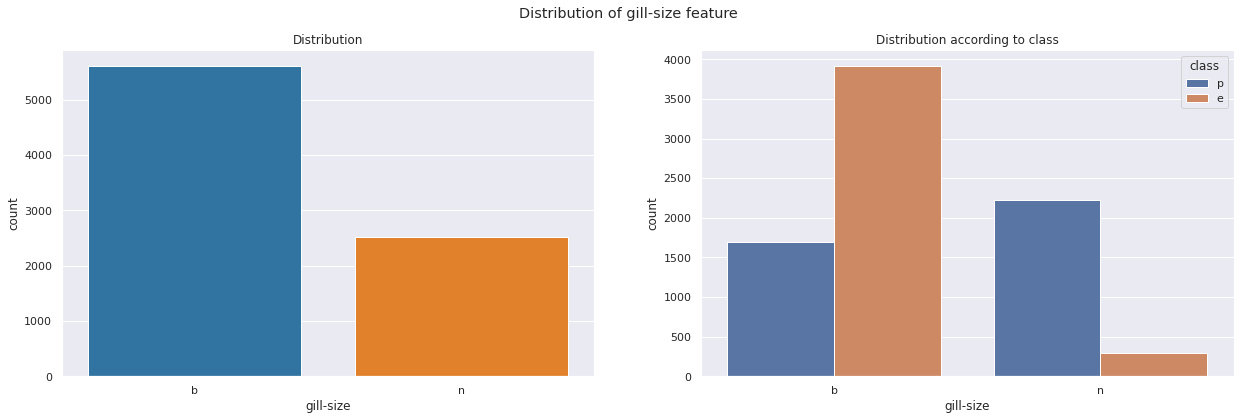

In [51]:
get_dists('gill-size')

# RandomForest

Just for completeness, let's also build a Random Forest Classifier and see the performance:

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Accuracy:  1.0
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       843
           p       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



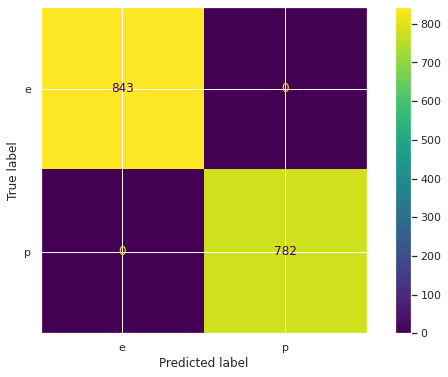

In [54]:
report_model(rf)

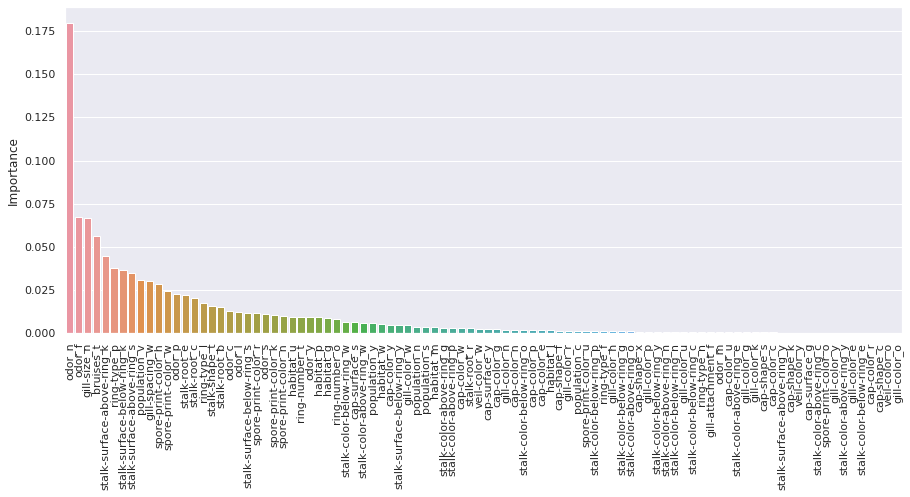

In [55]:
plt.figure(figsize=(15,6))
plot_importances(rf)